In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
x=np.array([1,2,3,4,5])
y=np.array([2,4,5,4,5])

In [3]:
m,c = np.polyfit(x,y,1)

In [4]:
pred = m*x + c

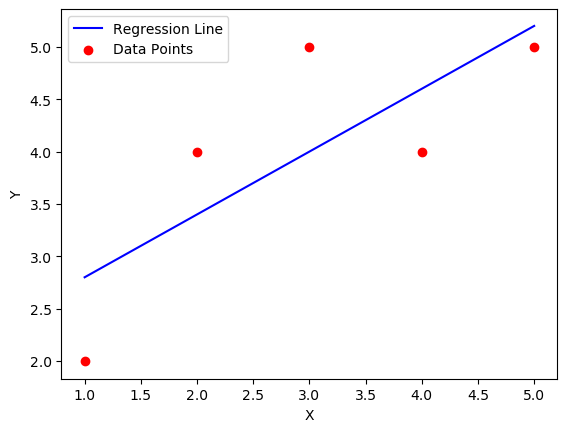

In [5]:
plt.scatter(x,y,label='Data Points',color='red')
plt.plot(x,pred,label='Regression Line',color='blue')
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()
plt.show()

In [6]:
print(f"Slope: {m}")
print(f"Intercept: {c}")

Slope: 0.6000000000000003
Intercept: 2.199999999999998


In [7]:
import pandas as pd
import seaborn as sns

In [8]:
df = pd.read_csv("car_data.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
Car_Name         301 non-null object
Year             301 non-null int64
Selling_Price    301 non-null float64
Present_Price    299 non-null float64
Kms_Driven       300 non-null float64
Fuel_Type        299 non-null object
Seller_Type      298 non-null object
Transmission     301 non-null object
Owner            301 non-null int64
dtypes: float64(3), int64(2), object(4)
memory usage: 21.3+ KB


In [10]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    2
Kms_Driven       1
Fuel_Type        2
Seller_Type      3
Transmission     0
Owner            0
dtype: int64

In [11]:
for col in ['Present_Price','Kms_Driven']:
    df[col] = df[col].fillna(df[col].mean())
for col in ['Fuel_Type','Seller_Type']:
    df[col] = df[col].fillna(df[col].mode()[0])

In [12]:
df.isna().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
rows,columns = df.shape
print(rows,columns)

301 9


In [14]:
df.drop(['Car_Name'],axis=1,inplace=True)

In [15]:
df['Year'] = 2024 - df['Year']

In [16]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,10,3.35,5.59,27000.0,Petrol,Dealer,Manual,0
1,11,4.75,9.54,43000.0,Diesel,Dealer,Manual,0
2,7,7.25,9.85,6900.0,Petrol,Dealer,Manual,0
3,13,2.85,4.15,5200.0,Petrol,Dealer,Manual,0
4,10,4.60,6.87,42450.0,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988.0,Diesel,Dealer,Manual,0
297,9,4.00,5.90,60000.0,Petrol,Dealer,Manual,0
298,15,3.35,11.00,87934.0,Petrol,Dealer,Manual,0
299,7,11.50,12.50,9000.0,Diesel,Dealer,Manual,0


In [17]:
df = pd.get_dummies(df,drop_first=True)

In [18]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,10,3.35,5.59,27000.0,0,0,1,0,1
1,11,4.75,9.54,43000.0,0,1,0,0,1
2,7,7.25,9.85,6900.0,0,0,1,0,1
3,13,2.85,4.15,5200.0,0,0,1,0,1
4,10,4.60,6.87,42450.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,8,9.50,11.60,33988.0,0,1,0,0,1
297,9,4.00,5.90,60000.0,0,0,1,0,1
298,15,3.35,11.00,87934.0,0,0,1,0,1
299,7,11.50,12.50,9000.0,0,1,0,0,1


In [19]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
df['Year'] = sc.fit_transform(df[['Year']])

In [20]:
df

,Year,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,-0.128897,3.35,5.59,27000.0,0,0,1,0,1
1,0.217514,4.75,9.54,43000.0,0,1,0,0,1
2,-1.168129,7.25,9.85,6900.0,0,0,1,0,1
3,0.910335,2.85,4.15,5200.0,0,0,1,0,1
4,-0.128897,4.60,6.87,42450.0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...
296,-0.821718,9.50,11.60,33988.0,0,1,0,0,1
297,-0.475308,4.00,5.90,60000.0,0,0,1,0,1
298,1.603156,3.35,11.00,87934.0,0,0,1,0,1
299,-1.168129,11.50,12.50,9000.0,0,1,0,0,1


In [21]:
test = list(df.columns)
test.remove('Selling_Price')
test

['Year',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Seller_Type_Individual',
 'Transmission_Manual']

In [22]:
x=df[test]
y=df["Selling_Price"]

In [23]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.20,random_state=20)


In [24]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [25]:
lr.fit(x_train,y_train)

LinearRegression()

In [26]:
y_pred = lr.predict(x_test)

In [27]:
from sklearn.metrics import r2_score
r2score = r2_score(y_test,y_pred)
print("The Score is : ",r2score)

The Score is :  0.9235814633587744


In [28]:
new_data_point = [[-1.168129,12.50,9000,0,1,0,0,1]]
point_pred = lr.predict(new_data_point)
print(point_pred)

[10.04349871]


/usr/local/lib/python3.8/dist-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


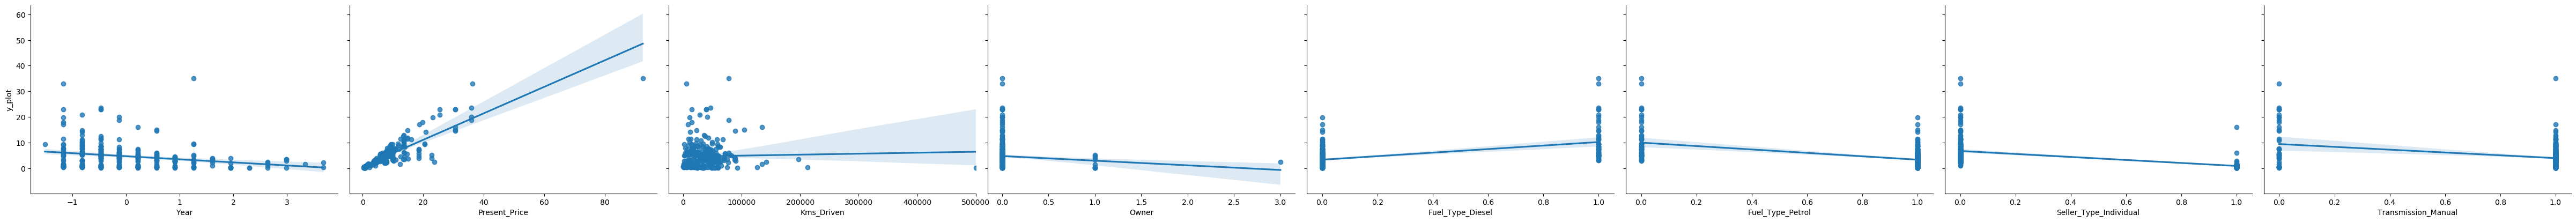

In [30]:
Data=x[:4]
Data['y_plot']=y

sns.pairplot(Data,y_vars='y_plot',x_vars=test,kind="reg",height=4 ,aspect=1.5)
plt.show()